# CNN实现MNIST手写数字识别

d:\Users\17214\miniconda3\envs\ail-tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8320 - loss: 0.5733 - val_accuracy: 0.9737 - val_loss: 0.0860
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9763 - loss: 0.0743 - val_accuracy: 0.9840 - val_loss: 0.0529
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.9849 - val_loss: 0.0505
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9888 - val_loss: 0.0394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9933 - loss: 0.0229 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accu


模型已保存到./models/mnist_model_cnn_tf.h5


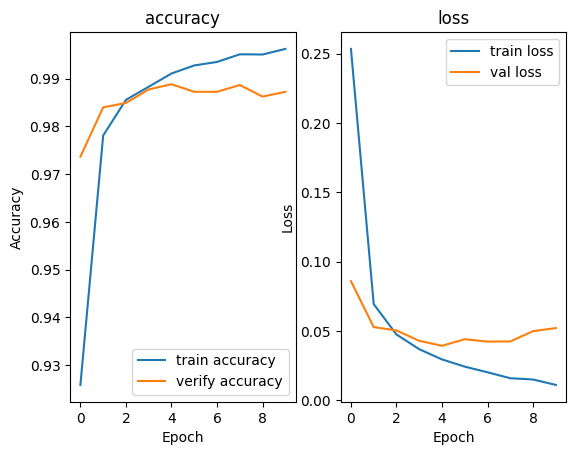

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import datasets,layers
import matplotlib.pyplot as plt

# 加载mnist数据集
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  #28-3+1/1 + 1 = 26,32
    layers.MaxPooling2D((2,2)),             # 26/2=13,32
    layers.Conv2D(64,(3,3),activation='relu'), # 13-3+1/1 + 1 = 11,64
    layers.MaxPooling2D((2,2)),  # 11/2 = 6,64
    layers.Flatten(), # 6*6*64 = 2304
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,
                batch_size=128,
                epochs=10,
                validation_split=0.2)

test_loss,test_acc = model.evaluate(x_test,y_test)
print(f'accuracy: {test_acc:.4f}')

model.save('./models/mnist_model_cnn_tf.h5')  # 保存为HDF5格式
print("模型已保存到./models/mnist_model_cnn_tf.h5")

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='verify accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


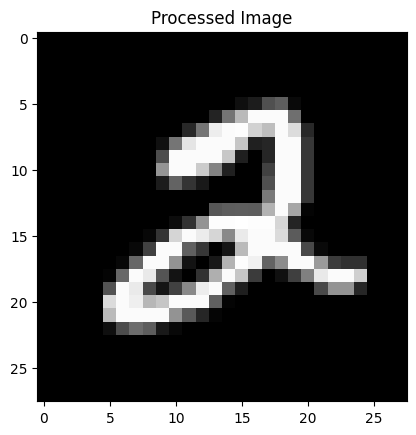

预处理后的数据范围： 0.12156863 0.83137256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
预测概率分布： [[3.0960881e-09 1.5032079e-09 9.9999988e-01 7.3625035e-09 2.2941347e-09
  3.6706155e-12 2.5781807e-12 7.7586833e-08 4.7858329e-08 1.4447438e-10]]
预测结果：2


In [8]:
# 测试tf训练的手写数据识别
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载模型
model = tf.keras.models.load_model('./models/mnist_model_cnn_tf.h5')

# 加载并预处理图片
image_path = './test/2.png'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
image = tf.keras.preprocessing.image.img_to_array(image)

# 可视化预处理后的图片
plt.imshow(image, cmap='gray')
plt.title('Processed Image')
plt.show()

# 进一步处理
image = image.reshape(-1, 28 , 28, 1) / 255.0

# 打印预处理后的数据
print("预处理后的数据范围：", np.min(image), np.max(image))

# 进行预测
predictions = model.predict(image)
print("预测概率分布：", predictions)

# 获取预测结果
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
print(f"预测结果：{predicted_class}")